In [1]:
! pip install openpyxl

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
! wget  https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-03-16 12:32:38--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [     <=>            ]  22.62M  23.5MB/s    in 1.0s    

2025-03-16 12:32:39 (23.5 MB/s) - ‘online+retail.zip’ saved [23715478]



In [4]:
! unzip online+retail.zip

Archive:  online+retail.zip
 extracting: Online Retail.xlsx      


In [5]:
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo':'string', 'StockeCode':'string', 'Description':'string', 'country':'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [6]:
df1.shape

(541909, 8)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2), string(2)
memory usage: 33.1+ MB


# **Data Cleaning: Handle Missing Value**

In [8]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [9]:
df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
df1[df1.StockCode	=="22139"].Description.mode()


,Description


In [11]:
most_freq = df1[["StockCode", "Description"]].value_counts().reset_index()
most_freq.head(5)

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638


In [12]:
most_freq[most_freq.StockCode=="85123A"]



,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
3350,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9
4038,85123A,?,1
4040,85123A,wrongly marked carton 22804,1


In [13]:
most_freq.columns = ["StockCode", "freq_Description", "count"]
df2 = df1.merge(most_freq, on="StockCode", how="left")
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,freq_Description,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,9.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,?,1.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,wrongly marked carton 22804,1.0
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0


In [14]:
df2['Description'] = df2['freq_Description']

In [15]:
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171188
Country,0
freq_Description,112
count,112


In [16]:
df2.dropna(subset=['Description'], inplace=True)
df2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,171076
Country,0
freq_Description,0
count,0


In [17]:
df2.drop(columns=['freq_Description','count'], inplace=True)
df2.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,710919.000000,710919,710919.000000,539843.000000
mean,9.718405,2011-07-05 11:53:55.375253248,4.410160,15290.162562
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-29 15:12:00,1.250000,13956.000000
50%,3.000000,2011-07-20 16:17:00,2.100000,15152.000000
75%,10.000000,2011-10-19 10:31:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,194.114446,NaN,84.525607,1709.392583


In [19]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
391449,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
391450,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [20]:
df3 = df2[df2.UnitPrice>0 & (df2.Quantity>0)]


**Feature Engineering: Create New Column**

In [21]:
df4 = df3.copy()
df4['TotalPrice'] = df3.Quantity*df3.UnitPrice
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df4['Month'] = df4.InvoiceDate.dt.month
df4.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
2,536365,85123A,?,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
3,536365,85123A,wrongly marked carton 22804,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
4,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


**Visualization & EDA**

1. Plot Monthly Sales

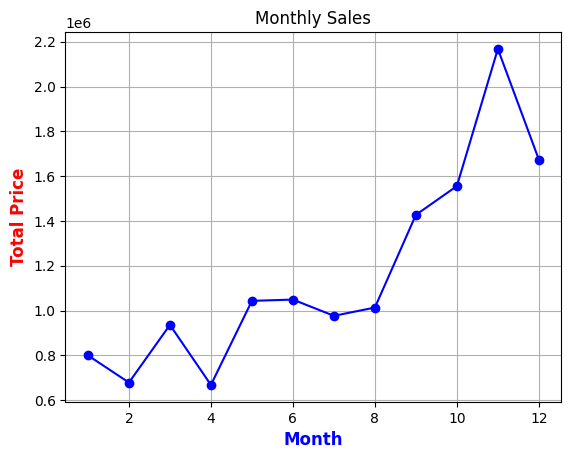

In [23]:
Monthly_Sales = df4.groupby('Month')["TotalPrice"].sum()
Monthly_Sales.plot(kind="line", title="Monthly Sales",color="blue", marker='o')
plt.xlabel("Month", fontsize=12, color="blue", fontweight="bold")
plt.ylabel("Total Price", fontsize=12, color="red", fontweight="bold")
plt.grid()
plt.show()

**Insights**

Total sales are rising up in the year end. This due to holiday season at the end of the year.

Top 5 countries

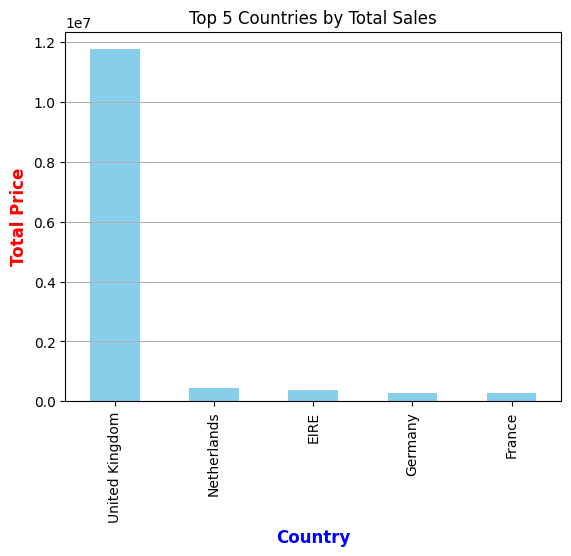

In [24]:
top_countries = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
top_countries.plot(kind='bar', title='Top 5 Countries by Total Sales', color='skyblue')
plt.xlabel('Country', fontsize=12, color='blue', fontweight='bold')
plt.ylabel('Total Price', fontsize=12, color='red', fontweight='bold')
plt.grid(axis='y')  # Add gridlines to the y-axis
plt.show()


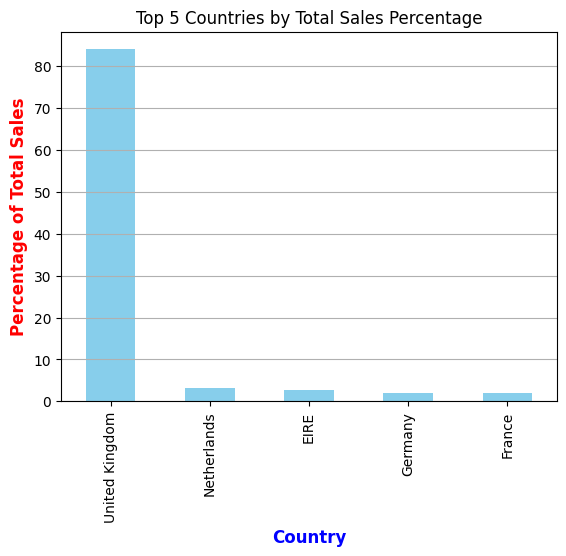

In [25]:
# prompt: plot same char now use percentage of top 5 countries

import pandas as pd
from matplotlib import pyplot as plt

# Assuming df4 is already created as in the previous code
country_wise_sales = df4.groupby('Country')['TotalPrice'].sum()
total_sales = country_wise_sales.sum()


top_countries = df4.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(5)
percentages = (top_countries / total_sales) * 100

percentages.plot(kind='bar', title='Top 5 Countries by Total Sales Percentage', color='skyblue')
plt.xlabel('Country', fontsize=12, color='blue', fontweight='bold')
plt.ylabel('Percentage of Total Sales', fontsize=12, color='red', fontweight='bold')
plt.grid(axis='y')

# Add percentage labels to each bar




**Top 5 product Sales**

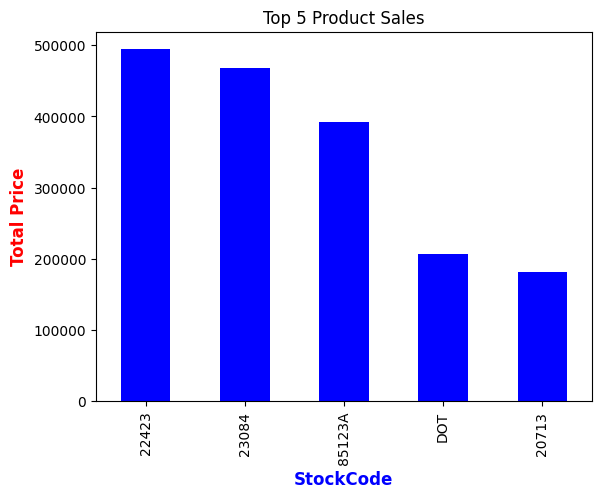

In [26]:
product_wise_sales = df4.groupby('StockCode')["TotalPrice"].sum()
top5_product = product_wise_sales.sort_values(ascending=False).head(5)
top5_product.plot(kind="bar", title="Top 5 Product Sales", color="blue")
plt.xlabel("StockCode", fontsize=12, color="blue", fontweight="bold")
plt.ylabel("Total Price", fontsize=12, color="red", fontweight="bold")
plt.show()

RFM Analysis

In [27]:
current_dt = df4.InvoiceDate.max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [29]:
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_dt - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,227,5971.21
12348.0,75,34,1930.44
12349.0,19,92,2165.86
12350.0,310,19,364.40


In [30]:
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)

In [31]:
rfm.sort_values('RFM_Score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_Score
CustomerID,,,,,,,
13362.0,3,209,3872.64,4,4,4,12
13001.0,4,444,12435.63,4,4,4,12
13050.0,9,537,7161.49,4,4,4,12
16931.0,5,1272,7013.46,4,4,4,12
15023.0,3,748,10296.66,4,4,4,12
...,...,...,...,...,...,...,...
13144.0,333,5,238.45,1,1,1,3
13133.0,274,11,181.90,1,1,1,3
13132.0,262,3,77.30,1,1,1,3


In [32]:
customer_last_purchase = df4.groupby("CustomerID")['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:17:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [33]:
type(customer_last_purchase)

pandas.core.series.Series

In [34]:

customer_last_purchase = (current_dt - customer_last_purchase).dt.days
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


In [36]:

churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Number of Churned Customers: 1454


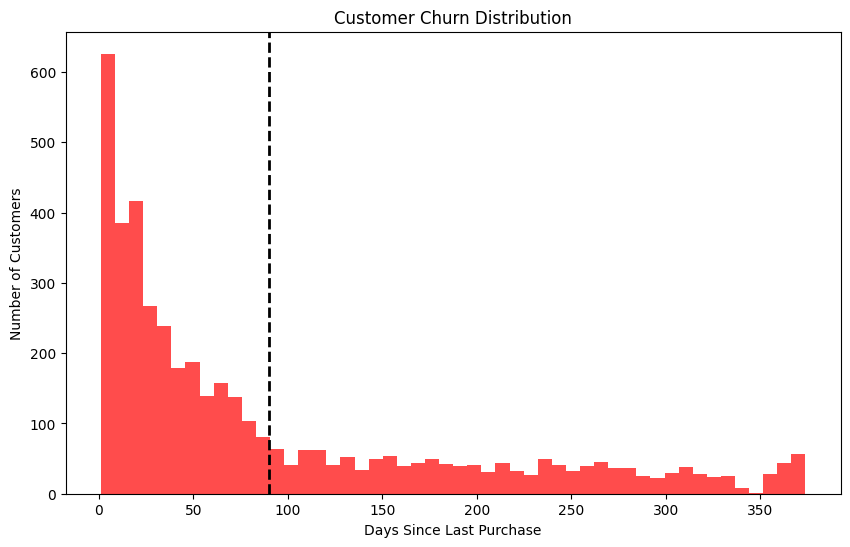

In [37]:
print("Number of Churned Customers:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color='red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.title('Customer Churn Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

NameError: name 'time' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')